In [4]:
# -*- coding: utf-8 -*-
"""
Created on Fri Oct  9 16:49:38 2020

@author: ravros
"""
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from sklearn.metrics import silhouette_samples, silhouette_score

#load file dist1.npy(from lab3_ex011.py)
dist1=np.load('dist1.npy')

In [5]:
#finction clust
def clust(dist,n_cl):
 
#cluster the data into k clusters, specify the k  
    kmeans = KMeans(n_clusters = n_cl)
    kmeans.fit(dist)
    #labels_ = best_label // its the symbol for each point (vector) to which center 
    #from couple of seeds and its detail the number cluster
    labels = kmeans.labels_ +1
    # its will be shaped like [1,46(data vectors)] something like this yes 
#show the clustering results  
    fig = plt.figure()
    # defines the size of the plot in squares where [0,0,1,1] will be a regular plot
    ax = fig.add_axes([0,0,1,1])
    ax.bar(range(len(labels)),labels)
    plt.show()

# calculate the silhouette values  
    silhouette_avg_ = silhouette_score(dist, labels)
    sample_silhouette_values_ = silhouette_samples(dist, labels)
    print(silhouette_avg_)
# show the silhouette values 
    plt.plot(sample_silhouette_values_) 
    plt.plot([silhouette_avg_]*46, 'r--') #useless line
    plt.title("The silhouette plot for the various vectors.")
    plt.xlabel("data number ")
    plt.ylabel("silhouette value for each value")
    y=silhouette_avg_
    xmin=0
    xmax=len(labels)
# The vertical line for average silhouette score of all the values
    plt.hlines(y, xmin, xmax, colors='red', linestyles="--") 
    plt.show()

    print("For n_clusters =", n_cl,
      "The average silhouette_score is:", silhouette_avg_)
    return labels




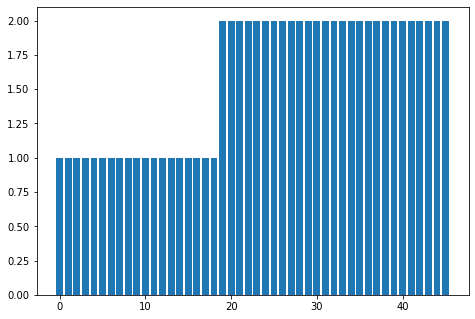

0.5086548846354738


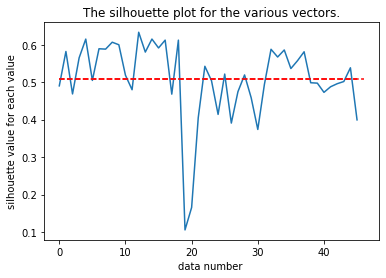

For n_clusters = 2 The average silhouette_score is: 0.5086548846354738


In [23]:
labels2 = clust(dist1, 2)

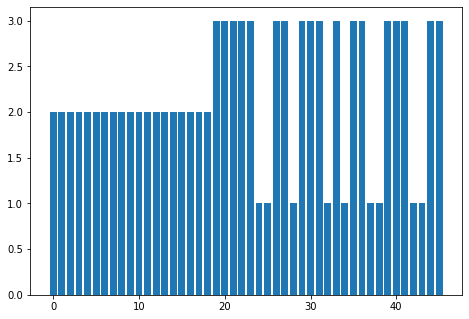

0.3067475245079877


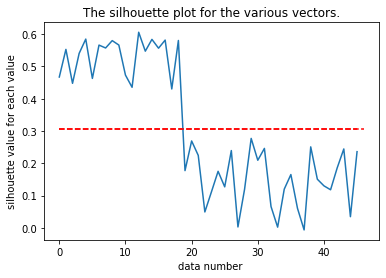

For n_clusters = 3 The average silhouette_score is: 0.3067475245079877


In [13]:
labels2 = clust(dist1, 3)

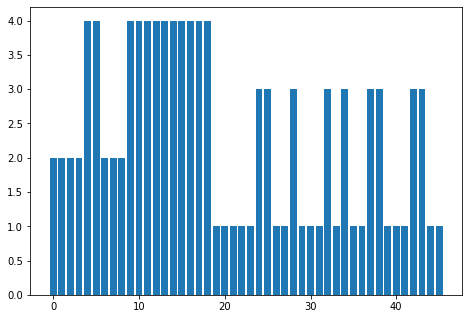

0.1947751256086064


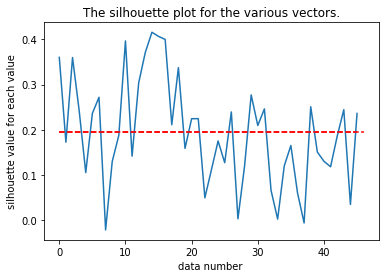

For n_clusters = 4 The average silhouette_score is: 0.1947751256086064


In [24]:
labels2 = clust(dist1, 4)

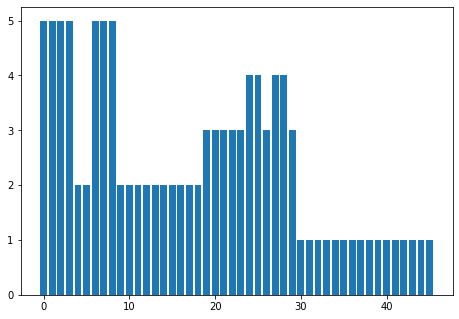

0.2027582792538868


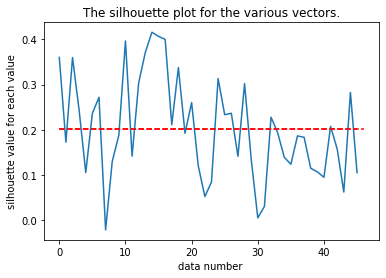

For n_clusters = 5 The average silhouette_score is: 0.2027582792538868


In [26]:
labels2 = clust(dist1, 5)

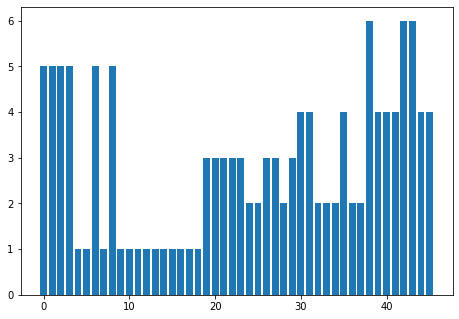

0.19413998226945137


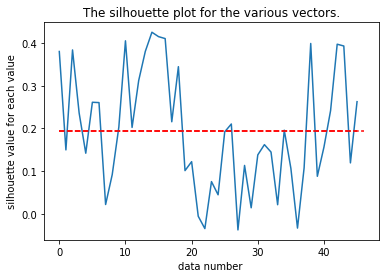

For n_clusters = 6 The average silhouette_score is: 0.19413998226945137


In [27]:
labels2 = clust(dist1, 6)

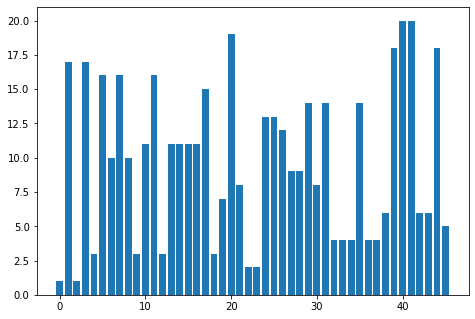

0.14028744286532577


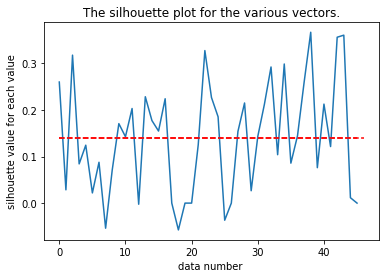

For n_clusters = 20 The average silhouette_score is: 0.14028744286532577


In [28]:
labels2 = clust(dist1, 20)

In [30]:
# import regular expressins packge
# import numbers package
import re
import numpy as np

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from sklearn.metrics import silhouette_samples, silhouette_score


#functions defonotion
def readFile(fileName):
    file = open(fileName,'r',encoding="cp437")
    fileStr = ""
    for line in file:
        fileStr += line
    return fileStr
        
# Remove extra spaces
# Remove non-letter chars    
# Change to lower 
def preProcess(fileStr):
    fileStr = re.sub(" +"," ", fileStr)
    fileStr = re.sub("[^a-zA-Z ]","", fileStr)
    fileStr = fileStr.lower()
    return fileStr

#Divide the file in chuncks of the same size wind
def partition_str(fileStr, wind):
    n = wind
    chunks = [fileStr[i:i+n] for i in range(0, (len(fileStr)//n)*n, n)]
    #print(chunks)
    count = len(chunks)
    return chunks, count;

rows = 3
fileContent = [""]*rows

#read  and preprocess files 
fileContent[0] = preProcess(readFile('Eliot.txt'))
fileContent[1] = preProcess(readFile('Tolkien.txt'))
fileContent[2] = preProcess(readFile("DB.txt"))

#wind - chunks size 
wind = 50000
#Divide the each file into chunks of the size wind 
chunks1, count1 = partition_str(fileContent[0] , wind)
chunks2, count2 = partition_str(fileContent[1] , wind)
chunks3, count3 = partition_str(fileContent[2] , wind)


# Concatinate all te chunks
rows = count1 + count2 + count3
chunks = chunks1 + chunks2 + chunks3

# Construct dictionary lines 54 - 65 
# Concatinate files contents
numFiles = 3
allFilesStr = ""
for i in range(numFiles):
    allFilesStr += fileContent[i]

# Generate a set of all words in files 
wordsSet =  set(allFilesStr.split())

# Read stop words file - words that can be removed
stopWordsSet = set(readFile('stopwords_en.txt').split())
# Remove the stop words from the word list
dictionary = wordsSet.difference(stopWordsSet)

# Count the number of dictionary words in files - Frequency Matrix
wordFrequency = np.empty((rows,len(dictionary)),dtype=np.int64)
for i in range(rows):
    print(i)
    for j,word in enumerate(dictionary):
        
        wordFrequency[i,j] = len(re.findall(word,chunks[i]))
        
# find the distance matrix between the text files - Distance Matrix
dist = np.empty((rows,rows))
for i in range(rows): 
    for j in range(rows):
        # calculate the distance between the frequency vectors
        dist[i,j] = np.linalg.norm(wordFrequency[i,:]-wordFrequency[j,:])
        
# find the sum of the frequency colomns and select colomns having sum > 100
minSum = 100
sumArray =  wordFrequency.sum(axis=0)
indexArray = np.where(sumArray > minSum)

indexArraySize = len(indexArray[0])
wordFrequency1 = np.empty((rows,indexArraySize),dtype=np.int64)

# generate a frequencey file with the selected coloumns 
for j in range(indexArraySize):
    wordFrequency1[:,j] = wordFrequency[:,indexArray[0][j]]

 # find the another distance matrix between the text files 
dist1 = np.empty((rows,rows))
for i in range(rows): 
    for j in range(rows):
        dist1[i,j] = np.linalg.norm(wordFrequency1[i,:]-wordFrequency1[j,:])
   
np.save('dist2',dist1,allow_pickle = True)  
     

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54


In [31]:
dist2=np.load('dist2.npy')

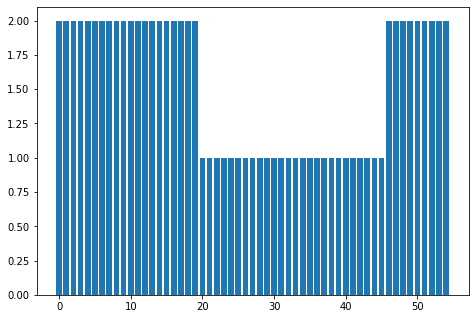

0.3930581688497115


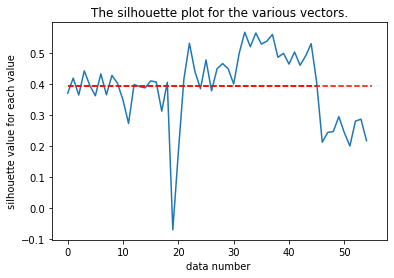

For n_clusters = 2 The average silhouette_score is: 0.3930581688497115


In [33]:
labels2 = clust(dist2, 2)

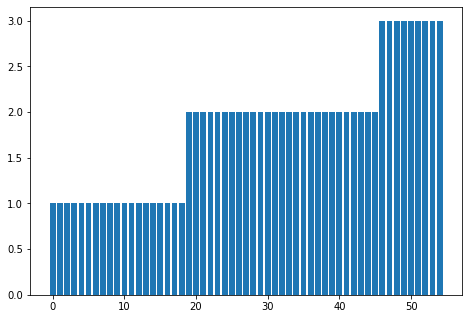

0.46958267242826374


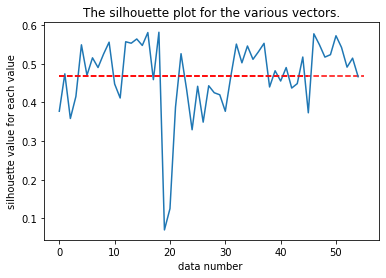

For n_clusters = 3 The average silhouette_score is: 0.46958267242826374


In [38]:
labels2 = clust(dist1, 3)

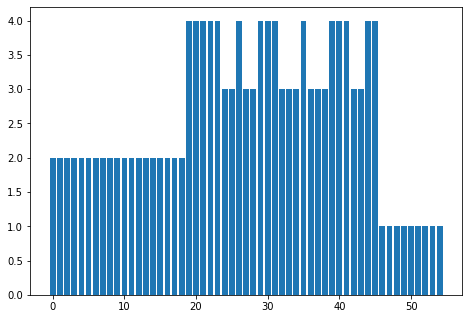

0.32282528052683634


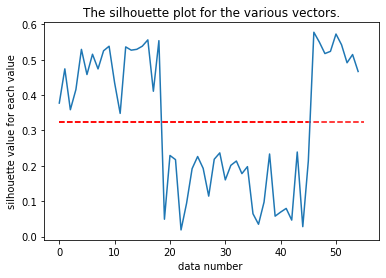

For n_clusters = 4 The average silhouette_score is: 0.32282528052683634


In [36]:
labels2 = clust(dist1, 4)


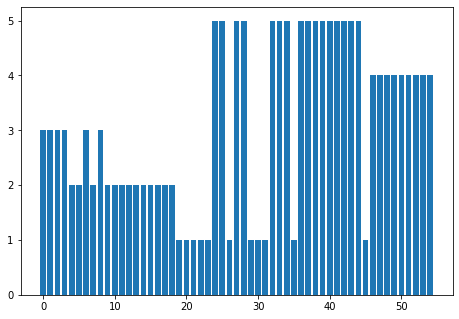

0.2364056740380302


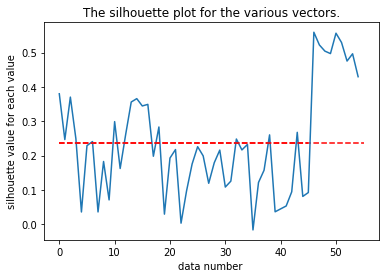

For n_clusters = 5 The average silhouette_score is: 0.2364056740380302


In [37]:
labels2 = clust(dist1, 5)
